In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv("cumulative.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df = pd.get_dummies(df)
df.head()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,kepler_name_Kepler-995 b,kepler_name_Kepler-996 b,kepler_name_Kepler-997 b,kepler_name_Kepler-998 b,kepler_name_Kepler-999 b,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE,koi_pdisposition_CANDIDATE,koi_pdisposition_FALSE POSITIVE,koi_tce_delivname_q1_q17_dr25_tce
0,1,10797460,1.000,0,0,0,0,9.488036,0.000028,-0.000028,...,0,0,0,0,0,1,0,1,0,1
1,2,10797460,0.969,0,0,0,0,54.418383,0.000248,-0.000248,...,0,0,0,0,0,1,0,1,0,1
4,5,10854555,1.000,0,0,0,0,2.525592,0.000004,-0.000004,...,0,0,0,0,0,1,0,1,0,1
5,6,10872983,1.000,0,0,0,0,11.094321,0.000020,-0.000020,...,0,0,0,0,0,1,0,1,0,1
6,7,10872983,1.000,0,0,0,0,4.134435,0.000010,-0.000010,...,0,0,0,0,0,1,0,1,0,1


In [4]:
y = df[["koi_pdisposition_CANDIDATE","koi_disposition_CONFIRMED","koi_disposition_FALSE POSITIVE","koi_pdisposition_FALSE POSITIVE"]]
target_names = ["CANDIDATE", "FALSE POSITIVE", "NOT DISPOSITIONED","CONFIRMED"]

In [5]:
X = df[['koi_fpflag_nt',
'koi_fpflag_ss',
'koi_fpflag_co',
'koi_fpflag_ec',
'koi_period',
'koi_time0bk',
'koi_impact',
'koi_duration',
'koi_depth',
'koi_prad',
'koi_teq',
'koi_insol',
'koi_model_snr',
'koi_steff',
'koi_slogg',
'koi_srad',
'ra',
'dec',
'koi_kepmag'
]]
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,9.488036,170.53875,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,0,0,0,0,54.418383,162.51384,0.586,4.5070,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
4,0,0,0,0,2.525592,171.59555,0.701,1.6545,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,0,0,0,0,11.094321,171.20116,0.538,4.5945,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
6,0,0,0,0,4.134435,172.97937,0.762,3.1402,686.0,2.77,1160.0,427.65,40.2,6046.0,4.486,0.972,296.28613,48.224670,15.714


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.998
k: 3, Train/Test Score: 0.999/0.998
k: 5, Train/Test Score: 0.999/0.996
k: 7, Train/Test Score: 0.999/0.995
k: 9, Train/Test Score: 0.994/0.989
k: 11, Train/Test Score: 0.994/0.989
k: 13, Train/Test Score: 0.992/0.989
k: 15, Train/Test Score: 0.993/0.989
k: 17, Train/Test Score: 0.991/0.988
k: 19, Train/Test Score: 0.989/0.986


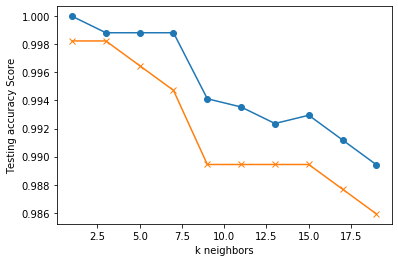

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.989


### MinMaxScaler


In [11]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

k: 1, Train/Test Score: 1.000/0.998
k: 3, Train/Test Score: 0.999/0.998
k: 5, Train/Test Score: 0.998/0.995
k: 7, Train/Test Score: 0.997/0.993
k: 9, Train/Test Score: 0.995/0.986
k: 11, Train/Test Score: 0.995/0.986
k: 13, Train/Test Score: 0.994/0.984
k: 15, Train/Test Score: 0.994/0.984
k: 17, Train/Test Score: 0.991/0.986
k: 19, Train/Test Score: 0.990/0.986


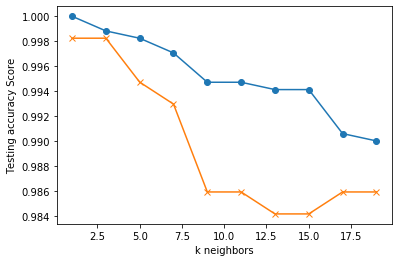

In [12]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()